<a href="https://colab.research.google.com/github/motm-1/Proyect_ETH/blob/main/ETH_2MINERS_PROYECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
from google.colab import files
from sklearn.preprocessing import StandardScaler

In [ ]:
#Keys
API_KEY = 'C2G6I46K8BJC2VPJWMQ59KQ8U3DWQC9XVS'
#myurl = 'https://eth.2miners.com/api/accounts/0xad3f0d4dfbfa0199736a270c1ec08bf373478faa'  global eth
eth_2miners = 1000000000
eth_etherscan = 1000000000000000000

In [ ]:
#make API call

def get_eth_addresses():

  eth_addresses = []
  url = 'https://eth.2miners.com/api/miners'

  response = requests.get(url).json()

  addresses = response['miners'].keys()
  addresses = list(addresses)

  for x in addresses:
    if x.find('0x') == 0:
      eth_addresses.append(x)
    else:
      pass

  return pd.Series(eth_addresses)

In [ ]:
#second API call

def get_eth_per_month(eth_addresses,range_start,range_end):
  eth_per_month = []

  for address in eth_addresses[range_start:range_end]:    
    url = 'https://eth.2miners.com/api/accounts/'+address
    response = requests.get(url)

    if response.status_code == 200:
      response = response.json()
      my_df = pd.DataFrame(response['sumrewards'])
      my_df = my_df['reward']/eth_2miners
      eth_per_month.append(my_df.iloc[4])
      
    else:
      eth_per_month.append(0)

  return pd.Series(eth_per_month)

In [ ]:
#Etherscan API call

def get_eth_current_balance(eth_addresses):
  eth_current_balance = pd.Series(dtype='int')
  x = 0
  y = 20
  z = len(eth_addresses.iloc[::20]) * 20 - 20

  for x in range(0,z,20):
    to_call = eth_addresses.iloc[x:y]
    x += 20
    y += 20
    url = 'https://api.etherscan.io/api?module=account&action=balancemulti&address='+to_call.iloc[0]+','+to_call.iloc[1]+','+to_call.iloc[2]+','+to_call.iloc[3]+','+to_call.iloc[4]+','+to_call.iloc[5]+','+to_call.iloc[6]+','+to_call.iloc[7]+','+to_call.iloc[8]+','+to_call.iloc[9]+','+to_call.iloc[10]+','+to_call.iloc[11]+','+to_call.iloc[12]+','+to_call.iloc[13]+','+to_call.iloc[14]+','+to_call.iloc[15]+','+to_call.iloc[16]+','+to_call.iloc[17]+','+to_call.iloc[18]+','+to_call.iloc[19]+'&tag=latest&apikey='+API_KEY

    response = requests.get(url).json()
    my_df = pd.DataFrame(response['result'])
    my_df.drop(columns='account', inplace=True)
    my_df = pd.Series(my_df['balance'])
    eth_current_balance = eth_current_balance.append(my_df)

  eth_rest_current_balance = []

  for x in range(z, len(eth_addresses)):
    url = 'https://api.etherscan.io/api?module=account&action=balance&address='+eth_addresses.iloc[x]+'&tag=latest&apikey='+API_KEY
    response = requests.get(url).json()
    eth_rest_current_balance.append(response['result'])

  eth_rest_current_balance = pd.Series(eth_rest_current_balance)
  eth_current_balance = pd.concat([eth_current_balance, eth_rest_current_balance], ignore_index=True)
  
  return eth_current_balance

In [ ]:
#download csv

def download_csv(to_download,name):
  to_download.to_csv(f'{name}.csv')
  files.download(f'{name}.csv')

In [3]:
# get ALL DATA from google drive
ETH_Data = pd.read_csv(r'/content/drive/MyDrive/ETH_DATA/ETH_Data.csv', index_col=0)

In [ ]:
# get eth address from google drive
eth_addresses = pd.read_csv(r"/content/drive/MyDrive/ETH_DATA/eth_addresses.csv", index_col=0)

In [ ]:
# get eth mined per month from google drive
eth_per_month = pd.read_csv(r"/content/drive/MyDrive/ETH_DATA/eth_per_month.csv",index_col=0)

In [ ]:
# eth eth balance from google drive
eth_balance = pd.read(r"/content/drive/MyDrive/ETH_DATA/eth_balance.csv",index_col=0)

In [4]:
ETH_Data

,ETH_address,ETH_mined_last_month,ETH_current_balance
0,0x000158342dca155ad497ec7399b7f79857402c57,0.145222,0.000000e+00
1,0x0001efce56eaa28fd5fee19b4e3af41f25033b06,0.024253,4.339425e-02
2,0x0002dbaddf1dacec07da3763211454b9957e67c0,0.022877,1.962510e-01
3,0x000323e1c3728b8f8af17baf0b0c0392e90e73ef,0.072669,3.853435e-01
4,0x00033881a4579d787d6758afa0f6184e50ea7923,0.143161,1.840000e-07
...,...,...,...
54462,0xfffbfd18e5ece549696e09395a8321391fba710e,0.299848,6.870220e+00
54463,0xfffbfea8f5b9ce6d67e62dd9920a2b866d0bc070,0.092846,5.928242e-02
54464,0xfffcd3ac3762af104b18852b7fb1723843d968d2,0.039395,0.000000e+00
54465,0xfffe2d500329983ab3750ec310a722540fea1098,0.079058,3.470030e-06


#General vision of the dataset

In [28]:
ETH_Data.dtypes

ETH_address              object
ETH_mined_last_month    float64
ETH_current_balance     float64
dtype: object

In [22]:
ETH_Data.describe()

,ETH_mined_last_month,ETH_current_balance
count,54467.000000,54467.000000
mean,0.307325,1.095947
std,2.850342,26.015356
min,0.000004,0.000000
25%,0.043689,0.006204
50%,0.103625,0.191024
75%,0.238627,0.530049
max,553.089383,5517.285884


#Unidimensional analisis of the variables

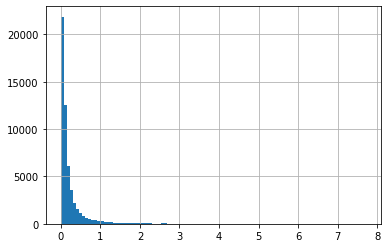

In [46]:
ETH_Data[ETH_Data['ETH_mined_last_month']< ETH_Data['ETH_mined_last_month'].quantile(0.9972)]['ETH_mined_last_month'].hist(bins=100)

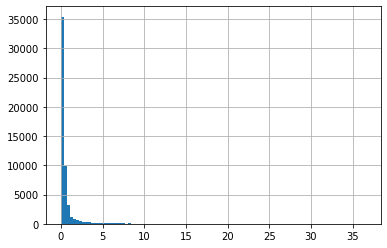

In [47]:
ETH_Data[ETH_Data['ETH_current_balance']< ETH_Data['ETH_current_balance'].quantile(0.9972)]['ETH_current_balance'].hist(bins=100)

[]

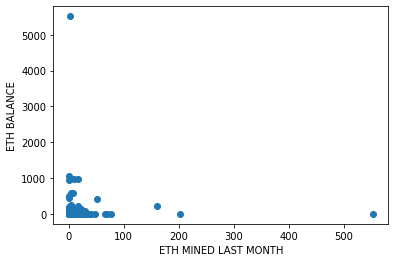

In [16]:
plt.scatter(ETH_Data['ETH_mined_last_month'], ETH_Data['ETH_current_balance'])
plt.xlabel('ETH MINED LAST MONTH')
plt.ylabel('ETH BALANCE')
plt.plot()

`Before continuing working on the data i need to normalize it`

[]

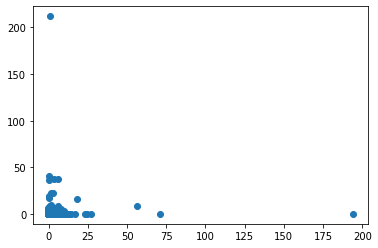

In [21]:
scaler = StandardScaler()
scaled = scaler.fit_transform(ETH_Data[['ETH_mined_last_month', 'ETH_current_balance']].values)
covariance_matrix = np.cov(scaled.T)

plt.scatter(x=scaled[:,0],y=scaled[:,1])
plt.plot()

In [27]:
ETH_Data.std()
ETH_Data.mean()
ETH_Data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


ETH_mined_last_month    0.103625
ETH_current_balance     0.191024
dtype: float64